In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
data_df = pd.read_csv("C:\\Users\\Hemant\\Documents\\Python Scripts\\Practise\\Pulsar_Star\\pulsar_stars_data\\pulsar_stars.csv")

In [25]:
data_df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [26]:
columns  = list(data_df.columns)
columns

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve',
 'target_class']

In [27]:
col_map = {' Mean of the integrated profile': 'm_int_profile',
           ' Standard deviation of the integrated profile' : 'sd_int_profile',
           ' Excess kurtosis of the integrated profile' : 'kurt_int_profile',
           ' Skewness of the integrated profile' : 'skew_int_profile',
           ' Mean of the DM-SNR curve' : 'm_dm_snr',
           ' Standard deviation of the DM-SNR curve': 'sd_dm_snr',
           ' Excess kurtosis of the DM-SNR curve' : 'kurt_dm_snr',
           ' Skewness of the DM-SNR curve' : 'skew_dm_snr',
           'target_class' : 'target_class'}

In [28]:
data_df.columns = data_df.columns.map(col_map)

In [29]:
data_df.head()

,m_int_profile,sd_int_profile,kurt_int_profile,skew_int_profile,m_dm_snr,sd_dm_snr,kurt_dm_snr,skew_dm_snr,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


<Figure size 504x432 with 0 Axes>

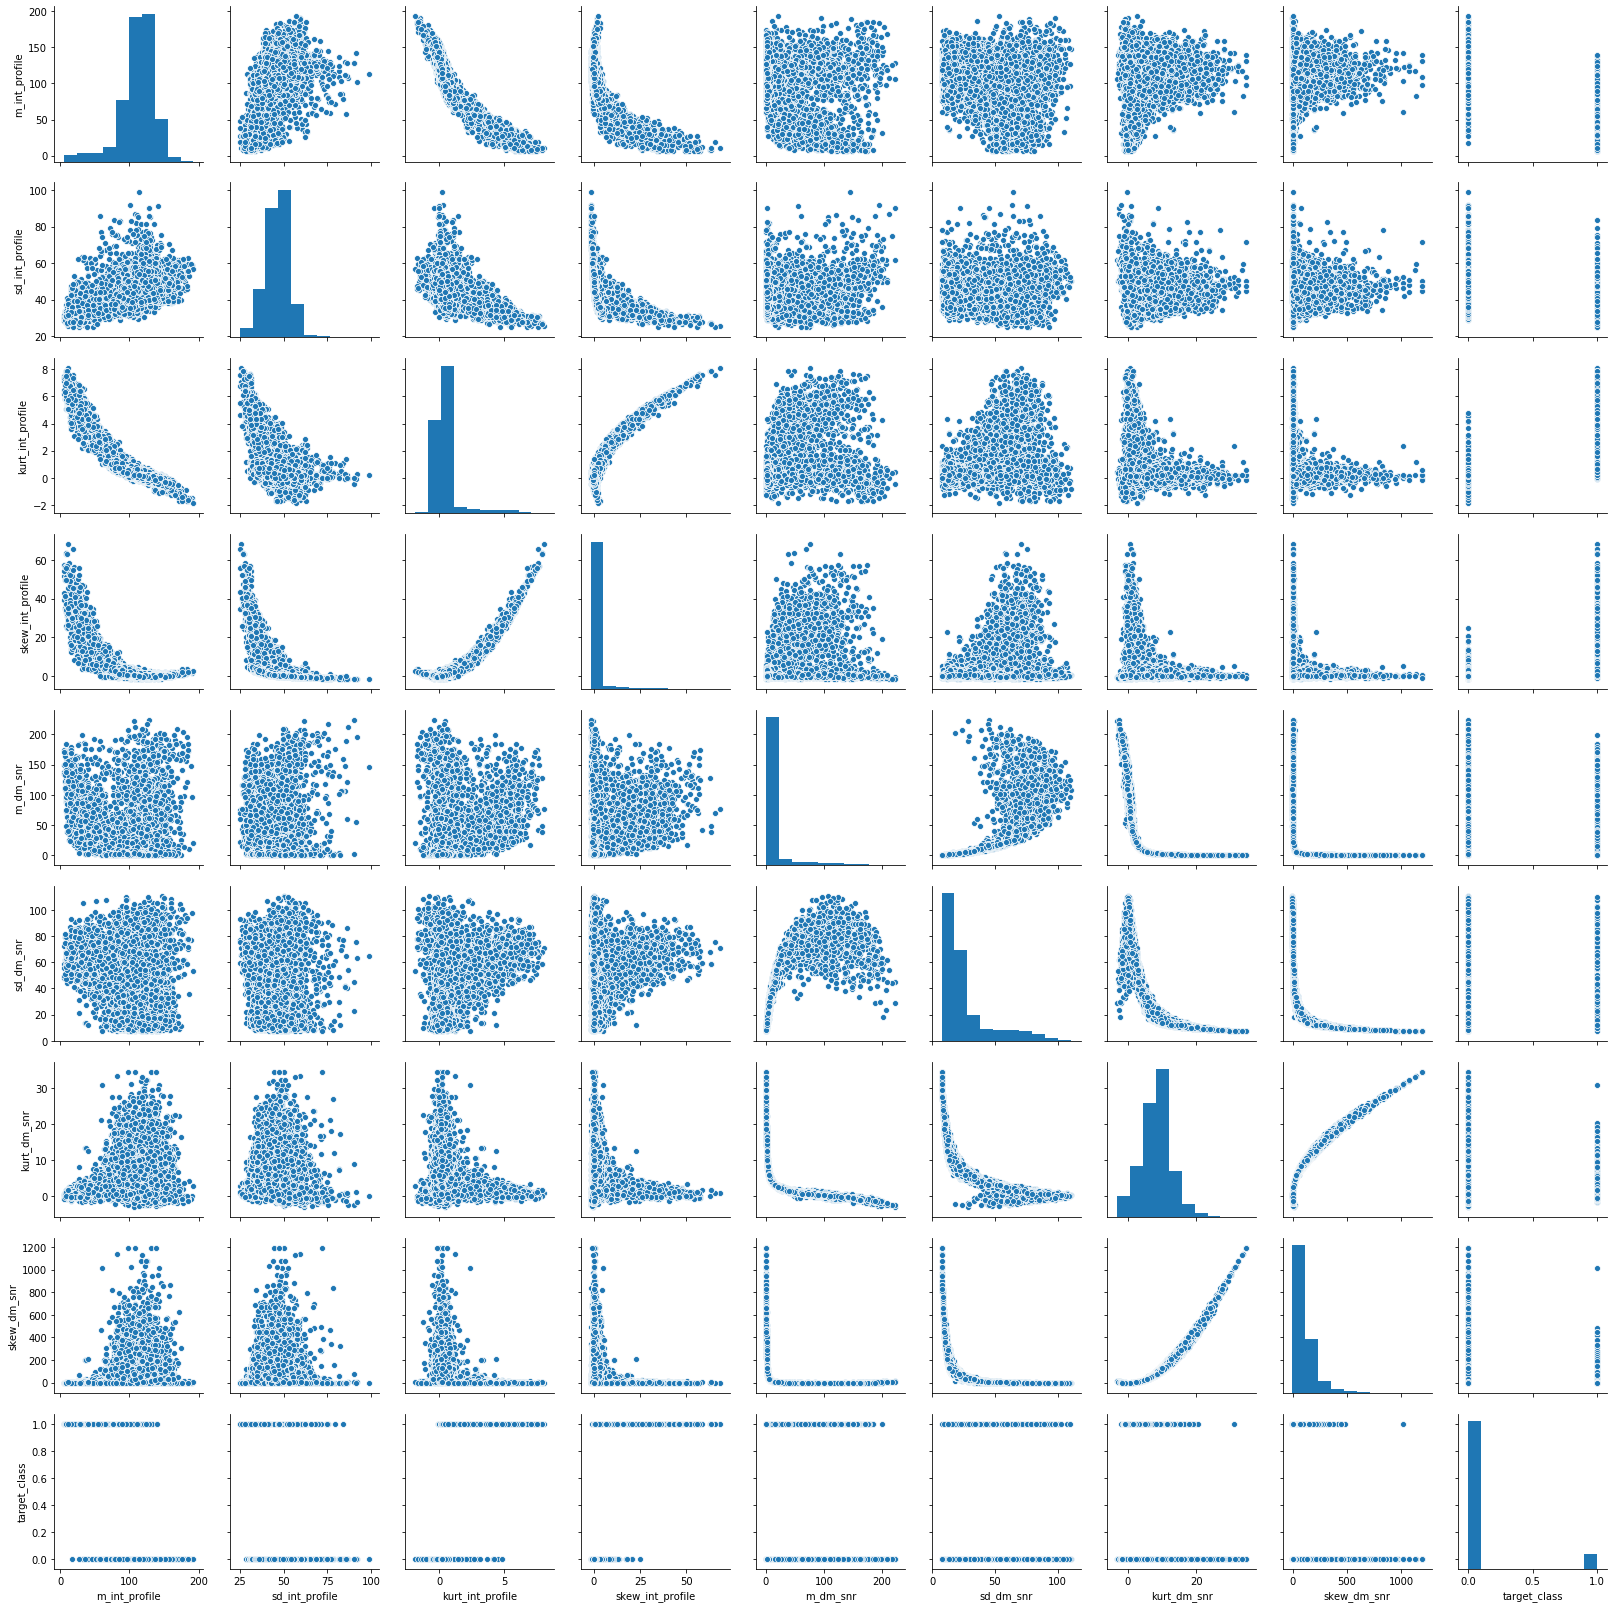

In [35]:
plt.figure(figsize = (7,6))
sns.pairplot(data_df)

(9.0, 0.0)

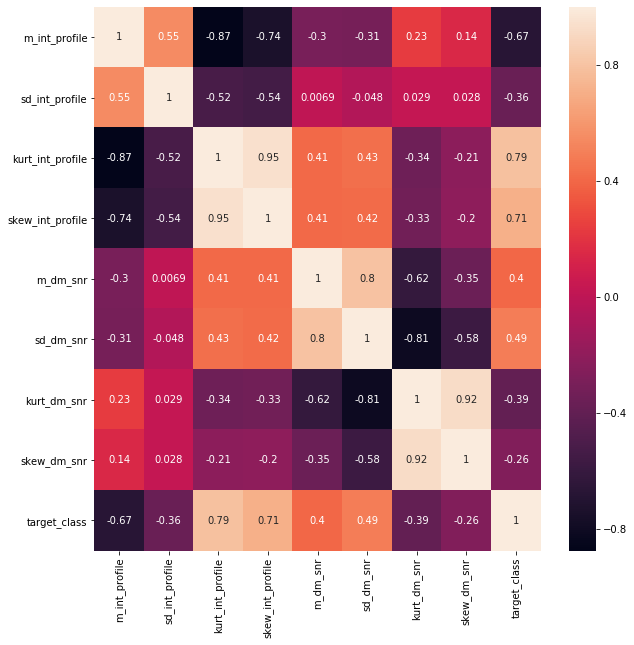

In [49]:
plt.figure(figsize = (10,10))
ax = sns.heatmap(data_df.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Looks like Kurt_int_profile, skew_int_profile, m_dm_snr, sd_dm_snr are the important features

In [72]:
#Using Feature_Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif


In [209]:
X = data_df.iloc[:,:-1]
y = data_df.iloc[:,-1]

In [74]:
kbest = SelectKBest(score_func=chi2, k = 5)

In [75]:
kbest.fit(X,y) # chi2 won't work for negative value in variables

ValueError: Input X must be non-negative.

In [76]:
kbest = SelectKBest(score_func=f_classif, k = 5)

In [77]:
kbest.fit(X,y)

SelectKBest(k=5, score_func=<function f_classif at 0x000001640AEEFE58>)

In [78]:
kbest.scores_

array([14830.93262534,  2728.25149474, 30033.32722354, 18143.23025023,
        3426.57238578,  5701.2553534 ,  3226.14085028,  1288.04481707])

In [79]:
kbest_scores = pd.DataFrame(kbest.scores_, columns = ['Scores'])
df_columns = pd.DataFrame(data_df.columns, columns = ['Columns'])

In [89]:
kbest_df = pd.concat([df_columns, kbest_scores], axis = 1)

In [91]:
kbest_df.sort_values(by = 'Scores', ascending = False)

,Columns,Scores
2,kurt_int_profile,30033.327224
3,skew_int_profile,18143.230250
0,m_int_profile,14830.932625
5,sd_dm_snr,5701.255353
4,m_dm_snr,3426.572386
6,kurt_dm_snr,3226.140850
1,sd_int_profile,2728.251495
7,skew_dm_snr,1288.044817
8,target_class,NaN


In [92]:
# Using Feature Importance

In [93]:
from sklearn.ensemble import ExtraTreesClassifier

In [94]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [95]:
model.feature_importances_

array([0.17698329, 0.05796953, 0.2829181 , 0.2063252 , 0.06054134,
       0.10654124, 0.06151465, 0.04720664])

In [99]:
feature_imp = pd.Series(model.feature_importances_, index = X.columns) # Row index

In [98]:
feature_imp

m_int_profile       0.176983
sd_int_profile      0.057970
kurt_int_profile    0.282918
skew_int_profile    0.206325
m_dm_snr            0.060541
sd_dm_snr           0.106541
kurt_dm_snr         0.061515
skew_dm_snr         0.047207
dtype: float64

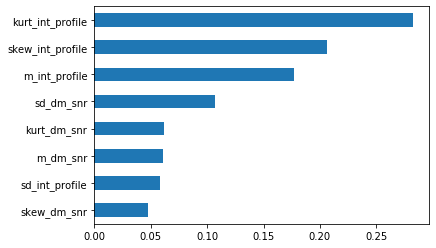

In [104]:
feature_imp.sort_values().plot(kind= 'barh')

Here also the best features seem to be kurt_int_profile, skew_int_profile, m_int_profile, sd_dm_snr

In [105]:
# Checking the predictions accuracy with logistic regression

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict


In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 23)

In [211]:
log_reg = LogisticRegression(solver = 'liblinear', random_state = 23)
#log_reg.fit(X_train, y_train)
y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv = 5)


In [212]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[10332,    56],
       [  185,   881]], dtype=int64)

(2.0, 0.0)

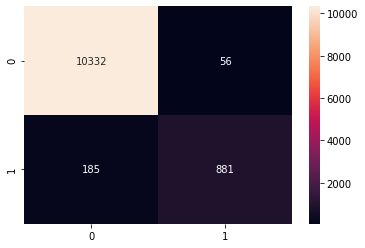

In [213]:
ax = sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [283]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, roc_curve

In [215]:
train_prec = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_prec, train_recall, train_f1_score

(0.9402347918890075, 0.8264540337711069, 0.8796804792810784)

In [216]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=23, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [234]:
X_train.head(); y_train.head()

10192    1
2        0
3014     0
6018     0
11911    0
Name: target_class, dtype: int64

In [239]:

#X_train.iloc[0,:].values.reshape(1,-1)
log_reg.decision_function(X_train.iloc[0,:].values.reshape(1,-1)), y_train[0]

(array([1.47028216]), 0)

In [263]:
y_train_decision_function = cross_val_predict(log_reg, X_train, y_train, cv = 5, method = "decision_function")
y_train_predict_proba = cross_val_predict(log_reg, X_train, y_train, cv = 5, method = "predict_proba")
y_train_predict = cross_val_predict(log_reg, X_train, y_train, cv = 5)

In [264]:
#np.round(y_proba,2)
y_train_decision_function.shape , y_train_predict_proba.shape, y_train_predict.shape

((11454,), (11454, 2), (11454,))

In [271]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_decision_function)


0.10220729366602688

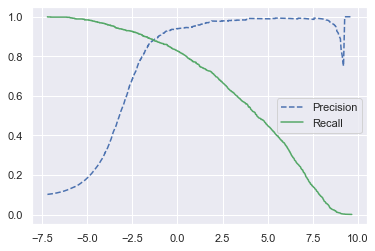

In [280]:
sns.set(style='darkgrid')
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = 'Precision')
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.legend()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


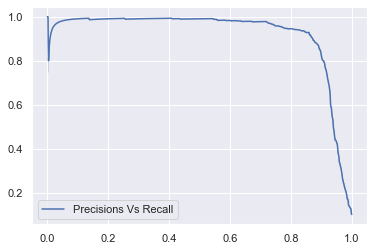

In [282]:
sns.lineplot(recalls, precisions, label = "Precisions Vs Recall")
plt.legend()

In [284]:
# ROC curve
fpr , tpr, threshold = roc_curve(y_train, y_train_decision_function)

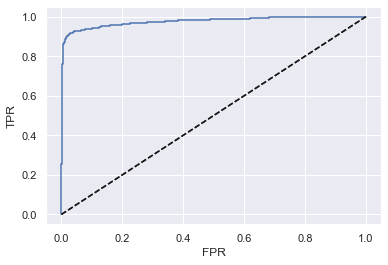

In [299]:
plt.plot(fpr, tpr, "b-", label = "FPR vs TPR")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot([[0,0], [1,1]], "k--")

In [300]:
roc_auc_score(y_train,y_train_decision_function )

0.9767039794076151

In [301]:
y_pred_val = log_reg.predict(X_val)

(2.0, 0.0)

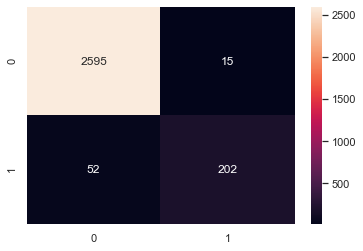

In [318]:
ax = sns.heatmap(confusion_matrix(y_val,y_pred_val), annot = True, fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [321]:
cm_val = confusion_matrix(y_val,y_pred_val)

In [325]:
tn = cm_val[0][0]
fp = cm_val[0][1]
fn = cm_val[1][0]
tp = cm_val[1][1]

In [327]:
misses = fn + fp
correct = tn + tp
accuracy = correct  * 100.0/ (correct + misses)
accuracy

97.66061452513966

In [330]:
y_pred_test = log_reg.predict(X_test)

In [334]:
cm_test = confusion_matrix(y_test,y_pred_test)

(2.0, 0.0)

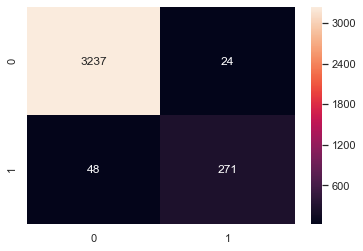

In [335]:
ax = sns.heatmap(cm_test, annot = True, fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [336]:
tn = cm_test[0][0]
fp = cm_test[0][1]
fn = cm_test[1][0]
tp = cm_test[1][1]
misses = fn + fp
correct = tn + tp
accuracy = correct  * 100.0/ (correct + misses)
accuracy

97.98882681564245

In [341]:
np.round(log_reg.coef_,2)

array([[ 0.  , -0.03,  5.39, -0.52, -0.03,  0.04, -0.24,  0.  ]])

In [356]:
dataframe = pd.DataFrame(log_reg.coef_.ravel(),X.columns).reset_index()
dataframe.rename(columns = {"index" : "features", 0 : "coeff"}, inplace = True)

In [359]:
dataframe.sort_values(by = "coeff", ascending = False)

,features,coeff
2,kurt_int_profile,5.388881
5,sd_dm_snr,0.039086
7,skew_dm_snr,0.004466
0,m_int_profile,0.000160
4,m_dm_snr,-0.032717
1,sd_int_profile,-0.033804
6,kurt_dm_snr,-0.240806
3,skew_int_profile,-0.521471


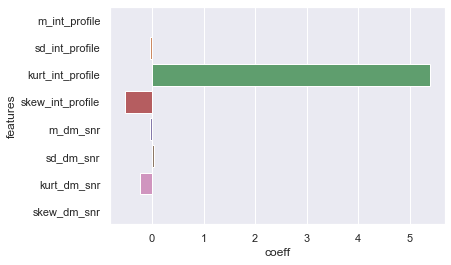

In [369]:
sns.barplot(dataframe['coeff'], dataframe['features'])